In [ ]:
谱聚类 https://www.youtube.com/watch?v=zkgm0i77jQ8&ab_channel=OmarSobh

思想：
将样本看作点，将样本之间的相似度看作带权的边，然后将聚类问题转为图分割问题

目标：
找到一种 **图分割** 的方法，使得：
1. 不同组（多个顶点）之间的权重，尽可能的低； 即组间相似度低
2. 组内的边权重尽量高，即组内相似度高

谱聚类的好处:
interwined spiral (太极图的clustering) 对比 spectral clustering 的结果 和 其他的结果

步骤：
1. 建立相连矩阵 Adjacency Matrix
2. 根据 A 计算 Laplacian 矩阵 L
3. 计算特征向量和特征矩阵
4. 切图

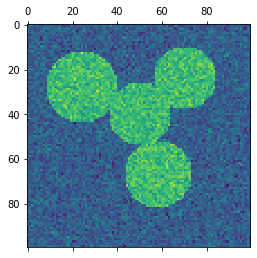

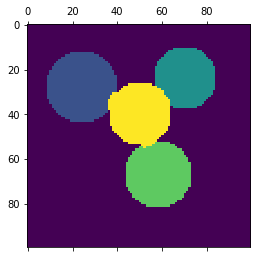

In [2]:
# 本例中，将圆形通过聚类识别出来
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

# 圆心
center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

# 半径
radius1, radius2, radius3, radius4 = 16, 14, 15, 14

# 建立4个圆圈
circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles 组成图
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
# img转化为bool量 TODO ?
# 我们关心的将两个圆圈区分，而不是将圆圈从背景中区分出来
# TODO 为什么这个mask可以起到以上效果呢？
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape) # TODO 为什么要是随机值？

# Convert the image into a graph with the value of the gradient on the
# edges.
# gradient 梯度的值 = 边的权
# TODO 所以mask只是图片到graph处理的一个部分，目前不用在意
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4) # 特征值分解策略 eigen_solver{None, ‘arpack’, ‘lobpcg’, or ‘amg’} TODO 研究下特征值分解在 Spectual 算法的第几步
# 好像没什么区别
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

In [9]:
# 官方安利中的内容
from sklearn.datasets import load_digits
from sklearn.manifold import SpectralEmbedding

embedding = SpectralEmbedding(n_components=2)

X,_ = load_digits(return_X_y=True)
print(X.shape)
print(X[0])

X_transformed = embedding.fit_transform(X[:100])
print(X_transformed[0])
plot_embedding(X_transformed,"Spectral embedding of the digits (time %.2fs)" % (time() - t0))

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 0.08769487 -0.02503534]


NameError: name 'time' is not defined

In [6]:
# 载入minist数据库
from sklearn.manifold import SpectralEmbedding
import tensorflow.keras.datasets.mnist as mnist
import numpy as np

(x_train_img, x_train_lable), (x_test_img, _) = mnist.load_data()
x_train_img = x_train_img.astype('float32') / 255.
x_train_img = x_train_img.reshape((len(x_train_img), np.prod(x_train_img.shape[1:])))
print(x_train_img.shape)


embedding = SpectralEmbedding(n_components=10)
keras_transformed = embedding.fit_transform(x_train_img[:5000])
print(keras_transformed.shape)
print(keras_transformed[0])

(60000, 784)
(5000, 10)
[ 5.17345232e-04 -6.40375764e-05  5.48122422e-04 -5.81835807e-04
 -7.13314025e-04 -3.79263517e-04  9.90770364e-04 -7.34472034e-05
  1.10590009e-04 -1.46259742e-04]


In [7]:
# 进行分类
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity="nearest_neighbors")
X = sc.fit_predict(keras_transformed)

In [13]:
for i in range(100):
    if x_train_lable[i] == 5:
        print(X[i])

0
0
7
7
7
